In [ ]:
# © Begum Celebi, ChatGPT, December 2025 
# Risk, Correlation, and Diversification Analysis: FTSE 100 vs BIST 100
# Data source: Investing.com
# Risk, Correlation, and Diversification Analysis: FTSE 100 vs BIST 100

In [ ]:
# Objective
# This project analyses the relationship between the FTSE 100 and BIST 100 using daily return data, 
# focusing on correlation dynamics, volatility, and risk-adjusted performance.
###
## Methodology
# - Daily returns used for analysis
# - Annualised returns and volatility (252 trading days)
# - Sharpe ratios (risk-free rate assumed zero)
# - 60-day rolling correlation
# - Monthly returns used to compute rolling 12-month volatility
###
## Key Findings
# - Average correlation ≈ 0.22, indicating weak co-movement
# - Correlation is time-varying and increases during periods of market stress
# - BIST 100 exhibits higher volatility but also higher realised Sharpe ratio
# - Results suggest diversification benefits for international portfolios
###
## Notes
# - Analysis is based on local-currency returns
# - Exchange rate risk is not included



--- MARKET RELATIONSHIP SUMMARY ---
               Metric FTSE 100 BIST 100
    Annualised Return    9.03%   42.95%
Annualised Volatility   12.73%   28.35%
         Sharpe Ratio     0.71     1.52
   Static Correlation     0.22     0.22


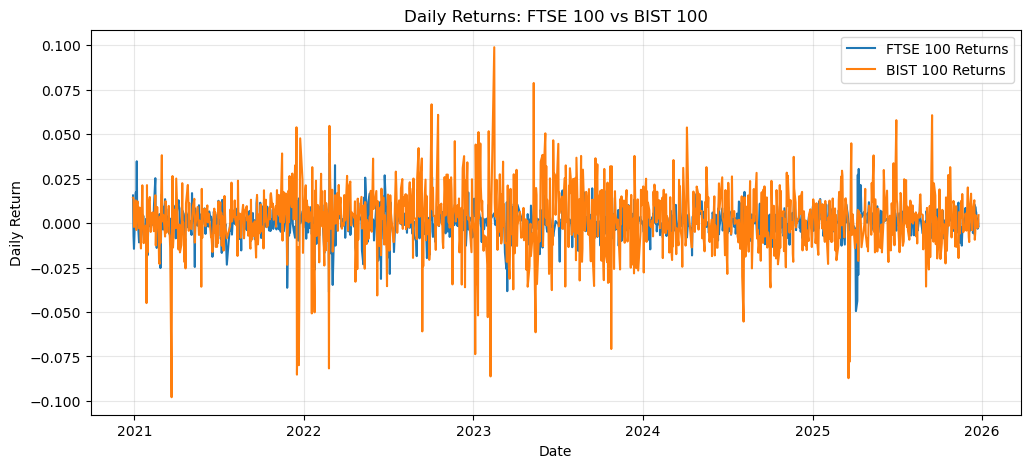

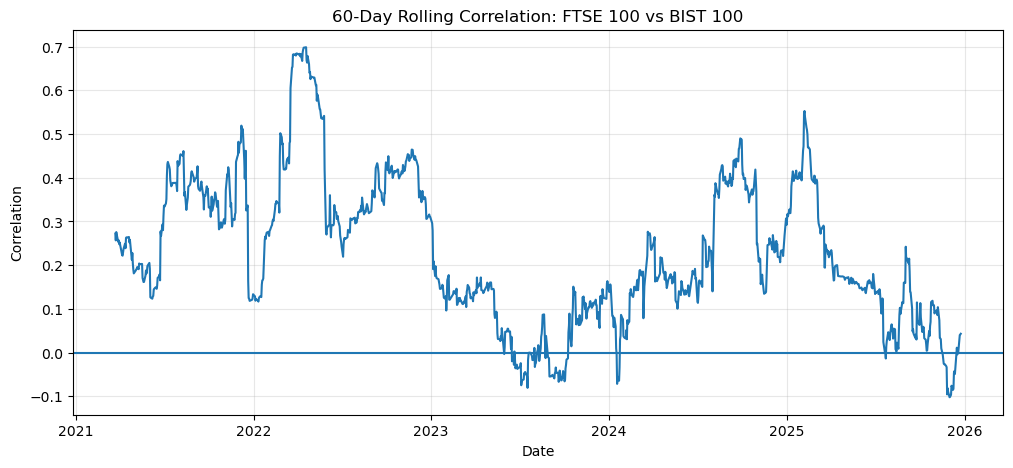

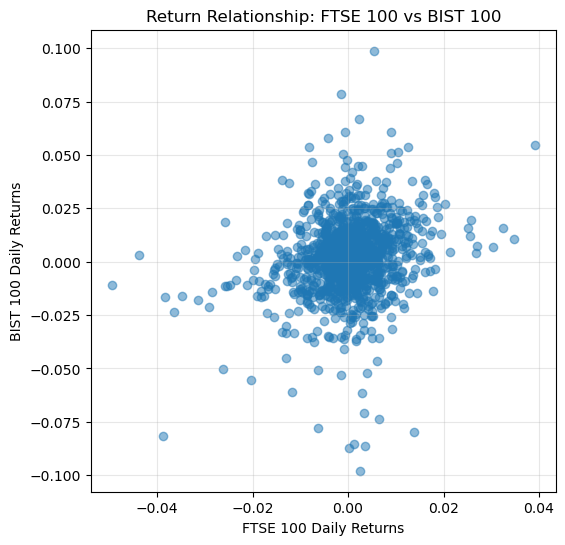

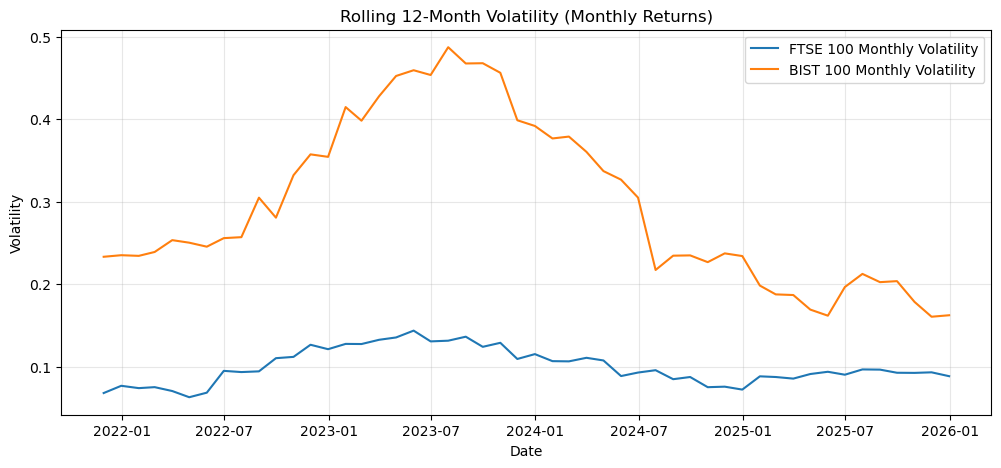

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --------------------------------------------------
# 1. LOAD & CLEAN DATA
# --------------------------------------------------
ftse = pd.read_csv('ftse_100 .csv')
bist = pd.read_csv('bist_100 .csv')

# Parse dates
ftse['date'] = pd.to_datetime(ftse['date'], dayfirst=True)
bist['date'] = pd.to_datetime(bist['date'], dayfirst=True)

# Ensure returns are numeric
ftse['ftse_change'] = pd.to_numeric(ftse['ftse_change'], errors='coerce')
bist['bist_change'] = pd.to_numeric(bist['bist_change'], errors='coerce')

# Drop missing values
ftse = ftse.dropna(subset=['date', 'ftse_change'])
bist = bist.dropna(subset=['date', 'bist_change'])

# Merge on common trading days
df = (
    pd.merge(ftse, bist, on='date', how='inner')
    .sort_values('date')
    .reset_index(drop=True)
)

# --------------------------------------------------
# 2. PARAMETERS
# --------------------------------------------------
TRADING_DAYS = 252
ROLLING_WINDOW = 60
RISK_FREE_RATE = 0.0  # explicit assumption

# --------------------------------------------------
# 3. RETURN, RISK & SHARPE METRICS
# --------------------------------------------------
# Annualised returns
ftse_ann_return = df['ftse_change'].mean() * TRADING_DAYS
bist_ann_return = df['bist_change'].mean() * TRADING_DAYS

# Annualised volatility
ftse_ann_vol = df['ftse_change'].std() * np.sqrt(TRADING_DAYS)
bist_ann_vol = df['bist_change'].std() * np.sqrt(TRADING_DAYS)

# Sharpe ratios
ftse_sharpe = (ftse_ann_return - RISK_FREE_RATE) / ftse_ann_vol
bist_sharpe = (bist_ann_return - RISK_FREE_RATE) / bist_ann_vol

# Static correlation
static_corr = df['ftse_change'].corr(df['bist_change'])

# --------------------------------------------------
# 4. ROLLING CORRELATION
# --------------------------------------------------
df['rolling_corr'] = (
    df['ftse_change']
    .rolling(ROLLING_WINDOW)
    .corr(df['bist_change'])
)

# --------------------------------------------------
# 5. SUMMARY TABLE
# --------------------------------------------------
summary = pd.DataFrame({
    'Metric': [
        'Annualised Return',
        'Annualised Volatility',
        'Sharpe Ratio',
        'Static Correlation'
    ],
    'FTSE 100': [
        f"{ftse_ann_return*100:.2f}%",
        f"{ftse_ann_vol*100:.2f}%",
        f"{ftse_sharpe:.2f}",
        f"{static_corr:.2f}"
    ],
    'BIST 100': [
        f"{bist_ann_return*100:.2f}%",
        f"{bist_ann_vol*100:.2f}%",
        f"{bist_sharpe:.2f}",
        f"{static_corr:.2f}"
    ]
})

print("\n--- MARKET RELATIONSHIP SUMMARY ---")
print(summary.to_string(index=False))

# --------------------------------------------------
# 6. VISUALS (UNCHANGED)
# --------------------------------------------------

# A. Daily returns
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['ftse_change'], label='FTSE 100 Returns')
plt.plot(df['date'], df['bist_change'], label='BIST 100 Returns')
plt.title('Daily Returns: FTSE 100 vs BIST 100')
plt.ylabel('Daily Return')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# B. 60-day rolling correlation
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['rolling_corr'])
plt.axhline(0)
plt.title('60-Day Rolling Correlation: FTSE 100 vs BIST 100')
plt.ylabel('Correlation')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.show()

# C. Scatter plot of returns
plt.figure(figsize=(6,6))
plt.scatter(df['ftse_change'], df['bist_change'], alpha=0.5)
plt.title('Return Relationship: FTSE 100 vs BIST 100')
plt.xlabel('FTSE 100 Daily Returns')
plt.ylabel('BIST 100 Daily Returns')
plt.grid(True, alpha=0.3)
plt.show()

# --------------------------------------------------
# 7. MONTHLY VOLATILITY COMPARISON (NEW VISUAL)
# --------------------------------------------------

# Set date as index for resampling
df_monthly = df.set_index('date')

# Convert daily returns to monthly returns
monthly_returns = (
    df_monthly[['ftse_change', 'bist_change']]
    .resample('ME')
    .apply(lambda x: (1 + x).prod() - 1)
)


# Rolling 12-month volatility of monthly returns (annualised)
monthly_vol = monthly_returns.rolling(12).std() * np.sqrt(12)

# Plot monthly volatility
plt.figure(figsize=(12,5))
plt.plot(monthly_vol.index, monthly_vol['ftse_change'], label='FTSE 100 Monthly Volatility')
plt.plot(monthly_vol.index, monthly_vol['bist_change'], label='BIST 100 Monthly Volatility')
plt.title('Rolling 12-Month Volatility (Monthly Returns)')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
